# LINEAR 100 DAYS

In [19]:
import pandas as pd
from datetime import datetime
from fbprophet import Prophet
from matplotlib import pyplot
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_percentage_error
from sklearn.metrics import r2_score

In [20]:
# load the file
day = pd.read_csv("./SN_d_tot_V2.0.csv", sep = ";", names = ["year", "month", "day", "Date_in_fraction_of_year",
                                                             "Daily_total_sunspot_number",
                                                             "Number_of_observations",
                                                             "Daily_standard_deviation",
                                                             "provisional_indicator"
                                                             ])

In [21]:
# Join column year, month
day["year"] = day["year"].astype(str)
day["month"] = day["month"].astype(str)
day["day"] = day["day"].astype(str)
day['period'] = day[['year', 'month', 'day']].apply(lambda x: '-'.join(x), axis=1)

In [22]:
# Utilsation des colonnes period et valeur
# using column period and year
day_f = day[["period","Daily_total_sunspot_number"]]

# rename column before using the model prophet
day_f.columns = ['ds', 'y']
day_f['ds'] = pd.to_datetime(day_f['ds'])

<ipython-input-22-7e7255a3c099>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  day_f['ds'] = pd.to_datetime(day_f['ds'])


In [23]:
train = day_f.drop(day_f.index[-204:])

#test =   year_f.drop( year_f.index[0:281])

In [24]:

m = Prophet(n_changepoints= 20,
                changepoint_range= 0.25,
                yearly_seasonality= True,
               changepoint_prior_scale= 0.9,
                seasonality_mode= "additive"
               )

ml = m.fit(train)

INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [36]:
# prediction

future = m.make_future_dataframe(periods = 100, freq = 'D')
forecast = m.predict(future)
forecast.head()

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,1818-01-01,35.076584,-63.181084,124.978867,35.076584,35.076584,-5.516078,-5.516078,-5.516078,0.080576,0.080576,0.080576,-5.596654,-5.596654,-5.596654,0.0,0.0,0.0,29.560506
1,1818-01-02,35.053106,-66.544340,120.262801,35.053106,35.053106,-6.149591,-6.149591,-6.149591,-0.383059,-0.383059,-0.383059,-5.766533,-5.766533,-5.766533,0.0,0.0,0.0,28.903515
2,1818-01-03,35.029628,-60.984072,126.603195,35.029628,35.029628,-5.771277,-5.771277,-5.771277,0.142463,0.142463,0.142463,-5.913740,-5.913740,-5.913740,0.0,0.0,0.0,29.258351
3,1818-01-04,35.006150,-70.019274,120.385847,35.006150,35.006150,-6.136283,-6.136283,-6.136283,-0.099298,-0.099298,-0.099298,-6.036985,-6.036985,-6.036985,0.0,0.0,0.0,28.869866
4,1818-01-05,34.982672,-69.930499,123.245107,34.982672,34.982672,-6.050002,-6.050002,-6.050002,0.085393,0.085393,0.085393,-6.135395,-6.135395,-6.135395,0.0,0.0,0.0,28.932670


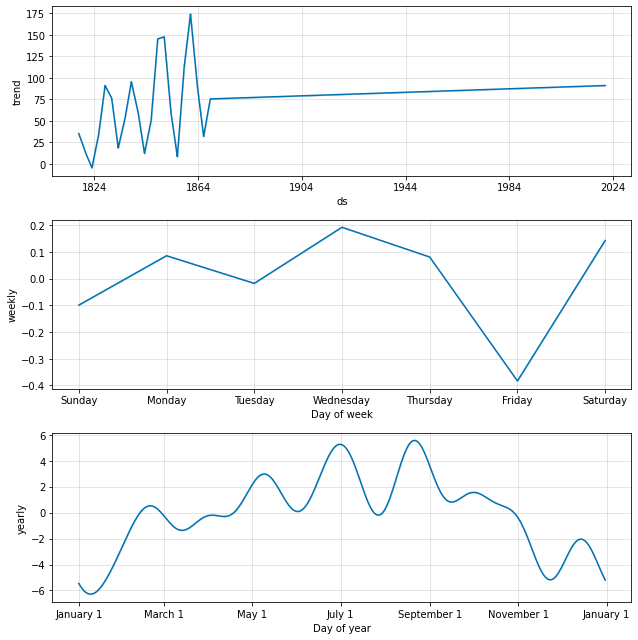

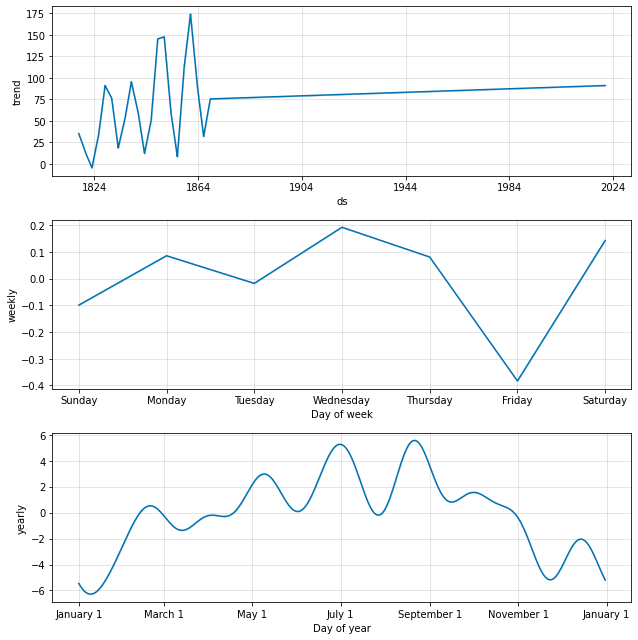

In [37]:
# plot the trend, annual seasonality and weekly seasonality of the time series
m.plot_components(forecast)

# CROSS VALIDATION

In [38]:
# using cross validation

from fbprophet.diagnostics import cross_validation
from fbprophet.diagnostics import performance_metrics

y_cv = cross_validation(ml, initial = '73000 days', period = '200 days', horizon = '1 day')
y_cv

INFO:fbprophet:Making 5 forecasts with cutoffs between 2018-05-30 00:00:00 and 2020-08-07 00:00:00


  0%|          | 0/5 [00:00<?, ?it/s]

,ds,yhat,yhat_lower,yhat_upper,y,cutoff
0,2018-05-31,96.617952,8.296221,190.772969,22,2018-05-30
1,2018-12-17,92.862941,-0.187150,181.469800,0,2018-12-16
2,2019-07-05,98.615348,7.008833,183.551302,0,2019-07-04
3,2020-01-21,87.132525,-3.504796,179.468493,0,2020-01-20
4,2020-08-08,93.935095,-2.142155,185.849098,12,2020-08-07


In [39]:
# evaluation the result of cross validation

from fbprophet.diagnostics import performance_metrics
yy = performance_metrics(y_cv )
yy

INFO:fbprophet:Skipping MAPE because y close to 0


,horizon,mse,rmse,mae,mdape,coverage
0,1 days,7644.357633,87.432017,87.032772,inf,0.8


In [ ]:
# calcultae the Rsquare
R2 = r2_score(y_cv_200['y'], y_cv_200['yhat'])
R2

# LINEAR 200 DAYS

In [40]:
# fitting the model

m_200 = Prophet(n_changepoints= 20,
                changepoint_range= 0.25,
                yearly_seasonality= True,
                changepoint_prior_scale= 0.9,
                seasonality_mode= "additive"
               )

ml_200 = m_200.fit(train)

INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [50]:

future_200 = m_200.make_future_dataframe(periods = 200, freq = 'D')
forecast_200 = m_200.predict(future_200)
forecast_200.head()

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,1818-01-01,35.076584,-69.734239,125.146109,35.076584,35.076584,-5.516078,-5.516078,-5.516078,0.080576,0.080576,0.080576,-5.596654,-5.596654,-5.596654,0.0,0.0,0.0,29.560506
1,1818-01-02,35.053106,-67.552079,127.606285,35.053106,35.053106,-6.149591,-6.149591,-6.149591,-0.383059,-0.383059,-0.383059,-5.766533,-5.766533,-5.766533,0.0,0.0,0.0,28.903515
2,1818-01-03,35.029628,-59.530613,121.300635,35.029628,35.029628,-5.771277,-5.771277,-5.771277,0.142463,0.142463,0.142463,-5.913740,-5.913740,-5.913740,0.0,0.0,0.0,29.258351
3,1818-01-04,35.006150,-57.836873,128.812592,35.006150,35.006150,-6.136283,-6.136283,-6.136283,-0.099298,-0.099298,-0.099298,-6.036985,-6.036985,-6.036985,0.0,0.0,0.0,28.869866
4,1818-01-05,34.982672,-63.691094,113.915905,34.982672,34.982672,-6.050002,-6.050002,-6.050002,0.085393,0.085393,0.085393,-6.135395,-6.135395,-6.135395,0.0,0.0,0.0,28.932670


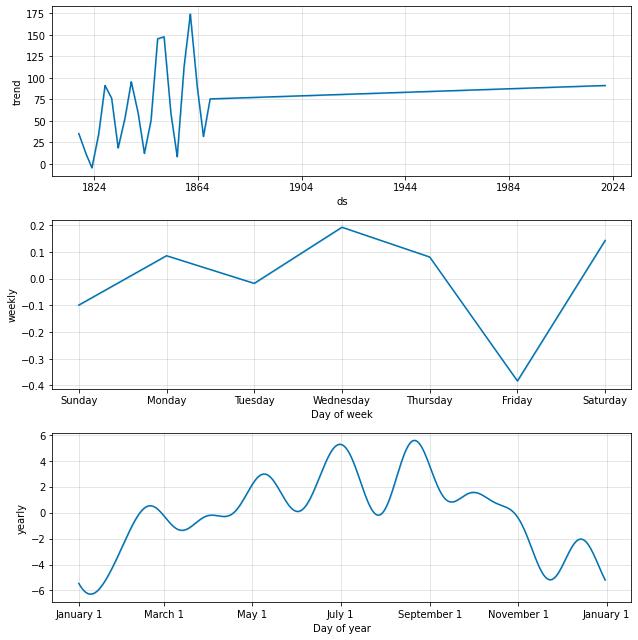

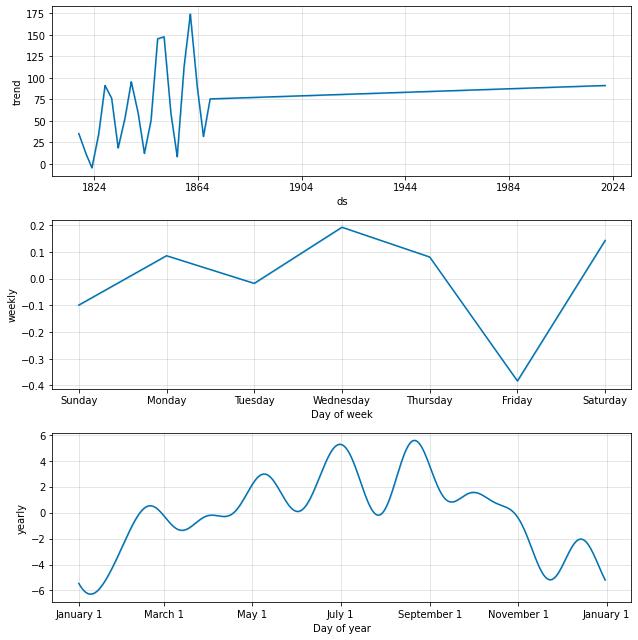

In [51]:
# plot the trend, annual seasonality and weekly seasonality of the time series
m_200.plot_components(forecast_200)

# CROSS VALIDATION FOR EVALUATING MODELS

In [52]:


from fbprophet.diagnostics import cross_validation
from fbprophet.diagnostics import performance_metrics

y_cv_200 = cross_validation(ml_200, initial = '73000 days', period = '200 days', horizon = '1 day')
y_cv_200

INFO:fbprophet:Making 5 forecasts with cutoffs between 2018-05-30 00:00:00 and 2020-08-07 00:00:00


  0%|          | 0/5 [00:00<?, ?it/s]

,ds,yhat,yhat_lower,yhat_upper,y,cutoff
0,2018-05-31,96.617952,-0.316653,193.699467,22,2018-05-30
1,2018-12-17,92.862941,-1.436241,189.681699,0,2018-12-16
2,2019-07-05,98.615348,4.068364,188.096042,0,2019-07-04
3,2020-01-21,87.132525,-7.600529,175.608614,0,2020-01-20
4,2020-08-08,93.935095,12.168004,194.794345,12,2020-08-07


In [53]:

from fbprophet.diagnostics import performance_metrics
yy_200 = performance_metrics(y_cv_200 )
yy_200

INFO:fbprophet:Skipping MAPE because y close to 0


,horizon,mse,rmse,mae,mdape,coverage
0,1 days,7644.357633,87.432017,87.032772,inf,0.6


In [54]:
# calcultae the Rsquare
R2 = r2_score(y_cv_200['y'], y_cv_200['yhat'])
R2

-95.32507097878901

# LINEAR 365 DAYS

In [55]:
# fitting th model
m_365 = Prophet(n_changepoints= 20,
                changepoint_range= 0.25,
                yearly_seasonality= True,
                changepoint_prior_scale= 0.9,
                seasonality_mode= "additive"
               )

ml_365 = m_365.fit(train)

INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [44]:


future_365 = m_365.make_future_dataframe(periods = 365, freq = 'D')
forecast_365 = m_365.predict(future_365)
forecast_365.head()

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,1818-01-01,35.076584,-55.897032,132.757002,35.076584,35.076584,-5.516078,-5.516078,-5.516078,0.080576,0.080576,0.080576,-5.596654,-5.596654,-5.596654,0.0,0.0,0.0,29.560506
1,1818-01-02,35.053106,-70.713136,113.040265,35.053106,35.053106,-6.149591,-6.149591,-6.149591,-0.383059,-0.383059,-0.383059,-5.766533,-5.766533,-5.766533,0.0,0.0,0.0,28.903515
2,1818-01-03,35.029628,-64.849292,121.475709,35.029628,35.029628,-5.771277,-5.771277,-5.771277,0.142463,0.142463,0.142463,-5.913740,-5.913740,-5.913740,0.0,0.0,0.0,29.258351
3,1818-01-04,35.006150,-64.426047,125.939764,35.006150,35.006150,-6.136283,-6.136283,-6.136283,-0.099298,-0.099298,-0.099298,-6.036985,-6.036985,-6.036985,0.0,0.0,0.0,28.869866
4,1818-01-05,34.982672,-64.334271,118.374063,34.982672,34.982672,-6.050002,-6.050002,-6.050002,0.085393,0.085393,0.085393,-6.135395,-6.135395,-6.135395,0.0,0.0,0.0,28.932670


# CROSS VALIDATION

In [47]:
# cross validation

from fbprophet.diagnostics import cross_validation
from fbprophet.diagnostics import performance_metrics

y_cv_365 = cross_validation(ml_365, initial = '73000 days', period = '200 days', horizon = '1 day')
y_cv_365

INFO:fbprophet:Making 5 forecasts with cutoffs between 2018-05-30 00:00:00 and 2020-08-07 00:00:00


  0%|          | 0/5 [00:00<?, ?it/s]

,ds,yhat,yhat_lower,yhat_upper,y,cutoff
0,2018-05-31,96.617952,6.105794,196.459593,22,2018-05-30
1,2018-12-17,92.862941,-1.596169,179.417689,0,2018-12-16
2,2019-07-05,98.615348,9.146137,189.680048,0,2019-07-04
3,2020-01-21,87.132525,-4.100886,183.574536,0,2020-01-20
4,2020-08-08,93.935095,0.131855,191.894077,12,2020-08-07


In [48]:
from fbprophet.diagnostics import performance_metrics
yy_365 = performance_metrics(y_cv_365)
yy_365

INFO:fbprophet:Skipping MAPE because y close to 0


,horizon,mse,rmse,mae,mdape,coverage
0,1 days,7644.357633,87.432017,87.032772,inf,0.8


In [49]:
# calcultae the Rsquare
R2 = r2_score(y_cv_365['y'], y_cv_365['yhat'])
R2

-95.32507097878901

In [11]:
# Tracé de la série
#f, ax = pyplot.subplots(figsize=(20, 10))
#pyplot.style.use("fivethirtyeight")
#pyplot.plot(day_f['ds'],day_f['y'])

INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


          ds       yhat  yhat_lower  yhat_upper
0 2020-11-21  23.717475  -63.241419  122.696492
1 2020-11-22  23.416905  -65.137999  109.720670
2 2020-11-23  23.584606  -69.484043  111.777612
3 2020-11-24  23.506612  -58.727151  122.023683
4 2020-11-25  23.773784  -57.274961  118.613517


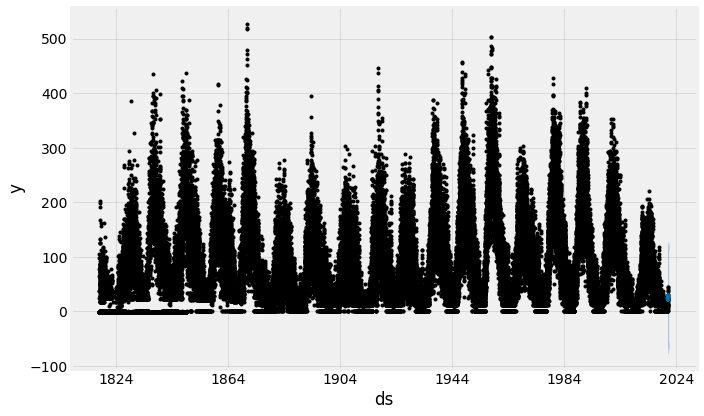

MAE: 17.829
MAPE: 33099729075129780.000000
R2: -0.181284


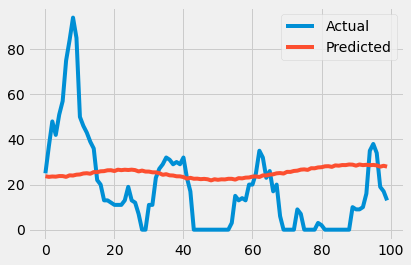

In [31]:
# for the last 100 days

train = day_f.drop(day_f.index[-100:])
test = day_f.drop(day_f.index[0:74104])
# define the model
from fbprophet import Prophet
model = Prophet()
# fit the model
model.fit(train)




# use the model to make a forecast
forecast = model.predict(test)
# summarize the forecast
print(forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].head())
# plot forecast
model.plot(forecast)
pyplot.show()








# calculate MAE 
y_true = test['y'].values
y_pred = forecast['yhat'].values
mae = mean_absolute_error(y_true, y_pred)
print('MAE: %.3f' % mae)


mape = mean_absolute_percentage_error(y_true, y_pred)
print('MAPE: %f' % mape)

R2 = r2_score(y_true, y_pred)
print('R2: %f' % R2)

pyplot.plot(y_true, label='Actual')
pyplot.plot(y_pred, label='Predicted')
pyplot.legend()
pyplot.show()

In [27]:
day_f.shape

(74204, 2)

In [39]:
train.head()

,ds,y
0,1818-01-01,-1
1,1818-01-02,-1
2,1818-01-03,-1
3,1818-01-04,-1
4,1818-01-05,-1


INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


          ds       yhat  yhat_lower  yhat_upper
0 2020-08-13  35.018688  -57.295340  121.523873
1 2020-08-14  34.826625  -56.669498  124.686126
2 2020-08-15  35.594579  -58.978576  131.212879
3 2020-08-16  35.554121  -55.899045  131.208305
4 2020-08-17  35.910942  -54.687793  124.291031


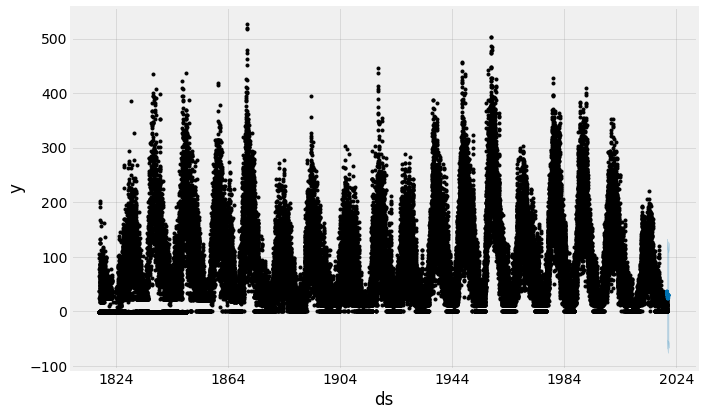

MAE: 20.809
MAPE: 52702017988451696.000000
R2: -0.987432


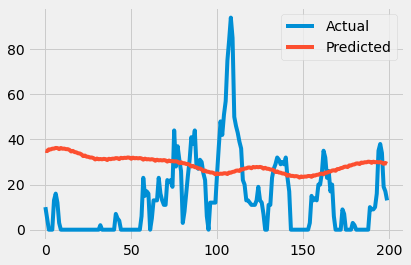

In [32]:
# for the last 100 days

train = day_f.drop(day_f.index[-200:])
test = day_f.drop(day_f.index[0:74004])
# define the model
from fbprophet import Prophet
model = Prophet()
# fit the model
model.fit(train)




# use the model to make a forecast
forecast = model.predict(test)
# summarize the forecast
print(forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].head())
# plot forecast
model.plot(forecast)
pyplot.show()








# calculate MAE 
y_true = test['y'].values
y_pred = forecast['yhat'].values
mae = mean_absolute_error(y_true, y_pred)
print('MAE: %.3f' % mae)


mape = mean_absolute_percentage_error(y_true, y_pred)
print('MAPE: %f' % mape)

R2 = r2_score(y_true, y_pred)
print('R2: %f' % R2)

pyplot.plot(y_true, label='Actual')
pyplot.plot(y_pred, label='Predicted')
pyplot.legend()
pyplot.show()

In [36]:
train

,ds,y
0,1818-01-01,-1
1,1818-01-02,-1
2,1818-01-03,-1
3,1818-01-04,-1
4,1818-01-05,-1
...,...,...
73834,2020-02-25,0
73835,2020-02-26,0
73836,2020-02-27,0
73837,2020-02-28,0


In [34]:
74204-365

73839

In [37]:
test.shape


(0, 2)

INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


          ds       yhat  yhat_lower  yhat_upper
0 2020-03-01  33.951987  -52.196120  127.885288
1 2020-03-02  34.003618  -59.269521  124.890324
2 2020-03-03  33.768775  -60.801313  123.113714
3 2020-03-04  33.847242  -56.733267  118.366731
4 2020-03-05  33.615448  -57.067024  119.588073


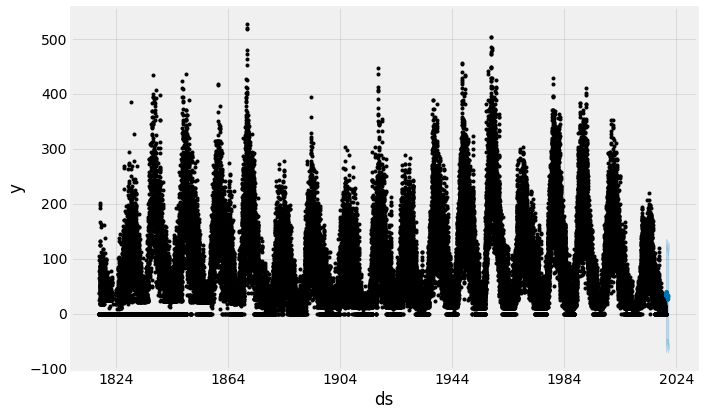

MAE: 26.107
MAPE: 75025241190857072.000000
R2: -3.011130


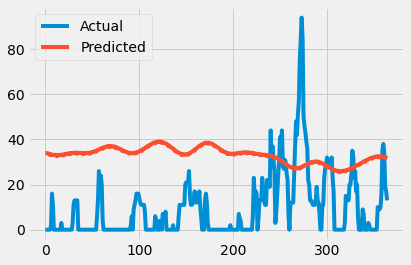

In [38]:
# for the last 365 days

train = day_f.drop(day_f.index[-365:])
test = day_f.drop(day_f.index[0:73839])
# define the model
from fbprophet import Prophet
model = Prophet()
# fit the model
model.fit(train)




# use the model to make a forecast
forecast = model.predict(test)
# summarize the forecast
print(forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].head())
# plot forecast
model.plot(forecast)
pyplot.show()








# calculate MAE 
y_true = test['y'].values
y_pred = forecast['yhat'].values
mae = mean_absolute_error(y_true, y_pred)
print('MAE: %.3f' % mae)


mape = mean_absolute_percentage_error(y_true, y_pred)
print('MAPE: %f' % mape)

R2 = r2_score(y_true, y_pred)
print('R2: %f' % R2)

pyplot.plot(y_true, label='Actual')
pyplot.plot(y_pred, label='Predicted')
pyplot.legend()
pyplot.show()